In [28]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [29]:
fashion_mnist = keras.datasets.fashion_mnist

In [30]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [31]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
              'Sandl', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [32]:
train_images.shape

(60000, 28, 28)

In [33]:
len(train_labels)

60000

In [34]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [35]:
test_images.shape

(10000, 28, 28)

In [36]:
len(test_labels)

10000

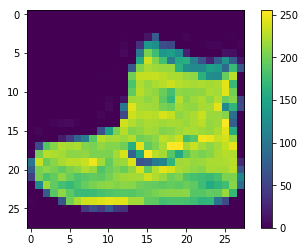

In [37]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

In [38]:
train_images = train_images / 255.0
test_images = test_images / 255.0

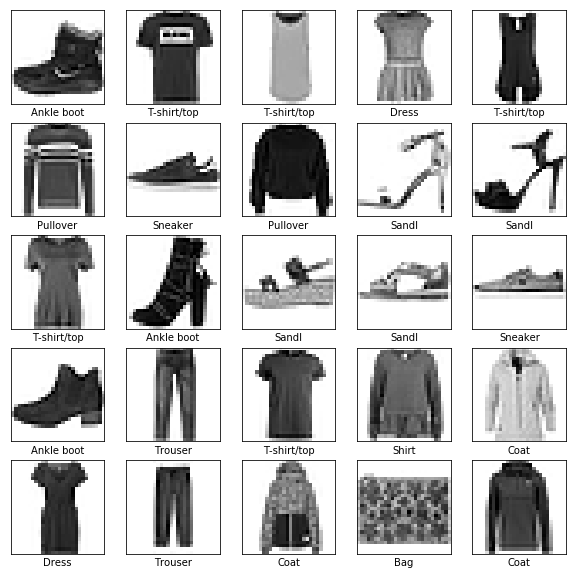

In [40]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [42]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

W0627 15:44:56.864607  6028 deprecation.py:506] From D:\Anaconda3\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [43]:
model.compile(optimizer=tf.train.AdamOptimizer(),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
    

In [45]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 2s 40us/sample - loss: 0.4927 - acc: 0.8268
Epoch 2/5
60000/60000 [==============================] - 2s 38us/sample - loss: 0.3712 - acc: 0.8659
Epoch 3/5
60000/60000 [==============================] - 2s 36us/sample - loss: 0.3335 - acc: 0.8788
Epoch 4/5
60000/60000 [==============================] - 2s 34us/sample - loss: 0.3107 - acc: 0.8858
Epoch 5/5
60000/60000 [==============================] - 2s 34us/sample - loss: 0.2927 - acc: 0.8920


In [46]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 20us/sample - loss: 0.3509 - acc: 0.8749
Test accuracy: 0.8749


In [47]:
predictions = model.predict(test_images)

In [48]:
predictions[0]

array([1.03712708e-04, 4.60424508e-06, 4.45555770e-06, 9.16269244e-07,
       1.17807640e-05, 6.00183941e-02, 1.10383706e-04, 7.12720826e-02,
       3.20074410e-04, 8.68153632e-01], dtype=float32)

In [49]:
np.argmax(predictions[0])

9

In [50]:
test_labels[0]

9

In [56]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

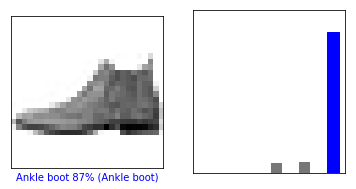

In [57]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

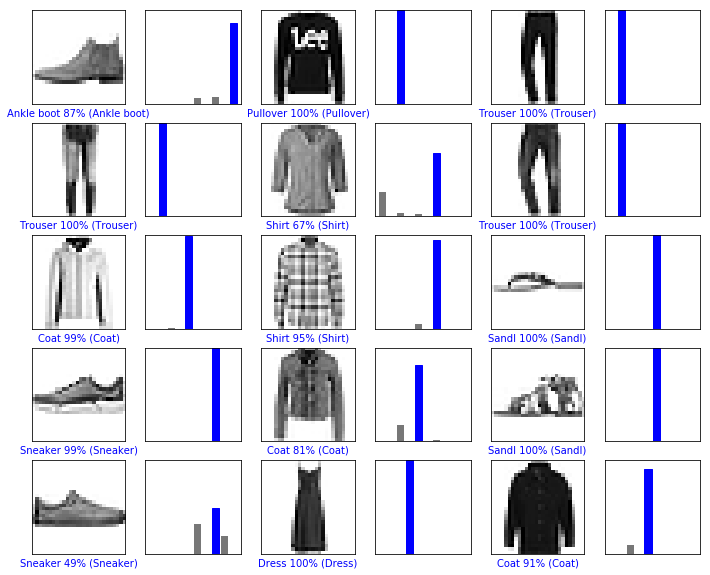

In [60]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)

In [61]:
img = test_images[0]

In [62]:
print(img.shape)

(28, 28)


In [63]:
img = (np.expand_dims(img, 0))

In [64]:
print(img.shape)

(1, 28, 28)


In [65]:
predictions_single = model.predict(img)

In [66]:
print(predictions_single)

[[1.03712708e-04 4.60424053e-06 4.45555770e-06 9.16270096e-07
  1.17807303e-05 6.00184202e-02 1.10383924e-04 7.12720826e-02
  3.20074876e-04 8.68153632e-01]]


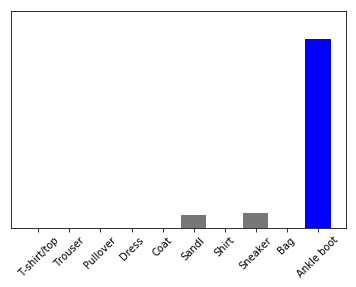

In [67]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [68]:
np.argmax(predictions_single[0])

9